The initial data "Life Expectancy data" which  downloaded from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who  has been adjusted into a new dataset "Life Expectancy-Data-Updated"-https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated. Data contains life expectancy, health, immunization, and economic and demographic information about 179 countries from 2000-2015 years with 21 variables and 2864 rows.

The database has one variable that categorizes countries into two groups: Developed vs Developing countries

Life expectancy is a statistical measure that represents the average number of years a person is expected to live based on various factors such as their birth year, gender, and other demographic characteristics. It is typically expressed as an average number of years and is often used as an indicator of the overall health and quality of life in a particular country or region.

In [1]:
#Import necessary liberaries 

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy.stats import f_oneway



from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('Life-Expectancy-Data-Updated.csv')


Basic Data Exploration

This step is performed to guage the overall data. The volume of data, the types of columns present in the data.

Initial assessment of the data is done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. I am looking at each column carefully and ask, does this column affect the values of the Target variable? In thos case I am asking the question does this column affect the attrition of workers? If the answer is a clear "No", then I will remove the column immediately from the data, otherwise I am keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python
head() : This helps to see a few sample rows of the data
info() : This provides the summarized information of the data
describe() : This provides the descriptive statistical details of the data
nunique(): This helps us to identify if a column is categorical or continuous

In [3]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [4]:
df.info()#Check the columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [5]:
#Looking at the descriptive statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2864.0,2007.500000,4.610577,2000.000,2003.75000,2007.5000,2011.250000,2015.0000
Infant_deaths,2864.0,30.363792,27.538117,1.800,8.10000,19.6000,47.350000,138.1000
Under_five_deaths,2864.0,42.938268,44.569974,2.300,9.67500,23.1000,66.000000,224.9000
Adult_mortality,2864.0,192.251775,114.910281,49.384,106.91025,163.8415,246.791375,719.3605
Alcohol_consumption,2864.0,4.820882,3.981949,0.000,1.20000,4.0200,7.777500,17.8700
Hepatitis_B,2864.0,84.292598,15.995511,12.000,78.00000,89.0000,96.000000,99.0000
Measles,2864.0,77.344972,18.659693,10.000,64.00000,83.0000,93.000000,99.0000
BMI,2864.0,25.032926,2.193905,19.800,23.20000,25.5000,26.400000,32.1000
Polio,2864.0,86.499651,15.080365,8.000,81.00000,93.0000,97.000000,99.0000
Diphtheria,2864.0,86.271648,15.534225,16.000,81.00000,93.0000,97.000000,99.0000


In [6]:
# Finding unique values for each column
# To understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is 
# likely to be a category otherwise continuous
df.nunique()

Country                         179
Region                            9
Year                             16
Infant_deaths                   847
Under_five_deaths              1035
Adult_mortality                2850
Alcohol_consumption            1164
Hepatitis_B                      80
Measles                          87
BMI                             120
Polio                            77
Diphtheria                       80
Incidents_HIV                   393
GDP_per_capita                 2564
Population_mln                 1803
Thinness_ten_nineteen_years     200
Thinness_five_nine_years        207
Schooling                       130
Economy_status_Developed          2
Economy_status_Developing         2
Life_expectancy                 396
dtype: int64

In [7]:
# Check missing/ null values in variables
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [8]:
duplicate_rows = df[df.duplicated()]
print('Number of duplicate rows: {}'.format(duplicate_rows.shape)) 

Number of duplicate rows: (0, 21)


Defining the problem statement

I am creating a Predictive model which can tell life expectabcy in regions of countries around the world based on factors that are represented in variables in the dataset ? Target Variable: Life expectancy

Predictors: Region,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption, Hepatitis_B, Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln, Thinness_ten_nineteen_years,Thinness_five_nine_years, Schooling,


Life expectancy Low = 0 Life expectancy high = 1

In [9]:
df.columns # call all the columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [12]:
# drop features not related to the project goal

df = df.drop(['Country', 'Year','Economy_status_Developed','Economy_status_Developing'],axis=1)

The 2020 average normal retirement age across OECD countries for an individual with a full career and who entered the labour market at age 22 was equal to 63.4 years for women and 64.2 years for men.

In [15]:
#Grouping values in the target variable "life expectancy" into low vs high. 

#The threshold will be defined as 64. This is based on the world's average retirement age 


threshold = 64

# Categorize values into 'low' or 'high'

df['Life_Expectancy_Category'] = df['Life_expectancy'].apply(lambda x: 'low' if x < threshold else 'high')

df.head()


,Region,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Life_Expectancy_Category
0,Middle East,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,76.5,high
1,European Union,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,82.8,high
2,Asia,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,65.4,high
3,South America,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,67.0,high
4,Middle East,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,81.7,high


In [16]:
# I now craeted a new dataframe df2 for useful columns   
  
df2 = df.drop(['Life_expectancy'],axis=1)

# Replace Life_Expectancy_Category column with 1 (high) and 0 (low)

df2['Life_Expectancy_Category'].replace('high', 1, inplace = True)
df2['Life_Expectancy_Category'].replace('low', 0, inplace = True)

df2.head()



,Region,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_Expectancy_Category
0,Middle East,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,1
1,European Union,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1
2,Asia,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,1
3,South America,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,1
4,Middle East,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1


Looking at the distribution of Target variable

I am looking at the target variable’s distribution of each class to make sure there is class balance.

This is important because if target variable's distribution is too skewed, the class imbalance will impact the machine learning algorithm ability to learn all the classes, thus, the predictive modeling will not be possible.

Bell curve is desirable but slightly positive skew or negative skew is also fine for performing Classification.

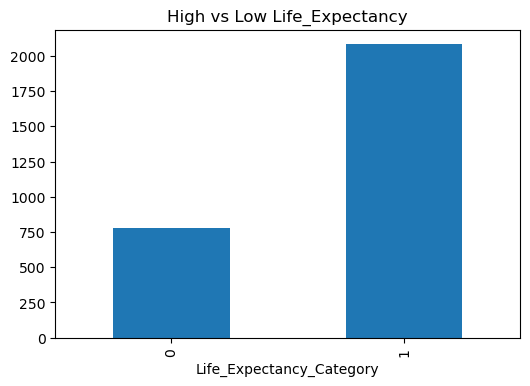

In [17]:
# Creating Bar chart as the Target variable is Categorical
GroupedData = df2.groupby('Life_Expectancy_Category').size()
GroupedData.plot(kind='bar', figsize=(6,4), title='High vs Low Life_Expectancy');

NOTE: We can see that the there is class inbalance in the distribution of target variable Life_Expectancy_Category

## Visual Exploratory Data Analysis